# ANALISIS FORECAST - Sesión 03

- Expositor: César Manuel Quezada Balcazar
- Email: cesar.quezada@dmc.pe
- LinkedIn: www.linkedin.com/in/quezada
- Tema: Procesamiento avanzado - Series de Tiempo

**Importamos los módulos necesarios**

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Forecast/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

**Leemos nuestra serie de tiempo desde un archvo csv**

In [ ]:
sales = pd.read_csv(path + 'sales_train.csv',sep = ',')

In [ ]:
sales.shape

(2935849, 6)

In [ ]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
# Validamos el correcto tipo de las variables
sales["date"] = pd.to_datetime(sales['date'], format='%d.%m.%Y')

In [ ]:
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
# re index date
sales.set_index('date',inplace = True)

In [ ]:
sales.head(5)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-02,0,59,22154,999.00,1.0
2013-01-03,0,25,2552,899.00,1.0
2013-01-05,0,25,2552,899.00,-1.0
2013-01-06,0,25,2554,1709.05,1.0
2013-01-15,0,25,2555,1099.00,1.0


[]

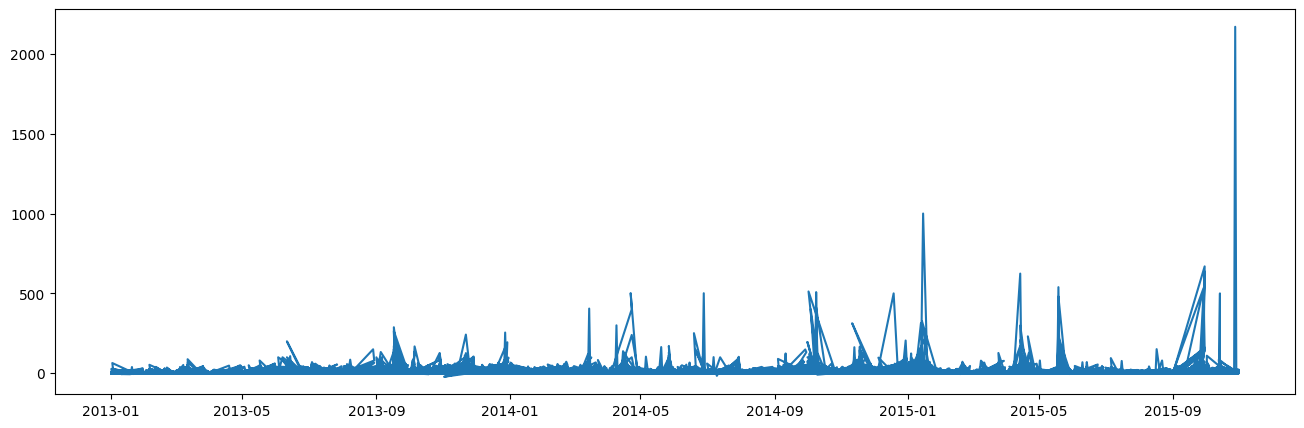

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(sales.item_cnt_day,color='tab:blue')
plt.plot()

**DETECCIÓN DE ANOMALIAS**

**(1) Método Univariados**

Este tipo de método funciona especialmente cuando está muy familiarizado con sus datos y ya sabe qué tipo de proceso y distribución sigue y, por lo tanto, qué umbral funciona mejor. Sin embargo, personalmente me parece más fácil dejar que un algoritmo de aprendizaje automático haga esto por mí en cualquier tipo de conjunto de datos de series temporales.

In [ ]:
sales.shape

(2935849, 5)

In [ ]:
## create time series
ventas = sales.groupby('date')['item_cnt_day'].sum().rename('sales')

In [ ]:
ventas = pd.DataFrame(ventas)
ventas.head(10)

,sales
date,
2013-01-01,1951.0
2013-01-02,8198.0
2013-01-03,7422.0
2013-01-04,6617.0
2013-01-05,6346.0
2013-01-06,5858.0
2013-01-07,4984.0
2013-01-08,4772.0
2013-01-09,3162.0


[]

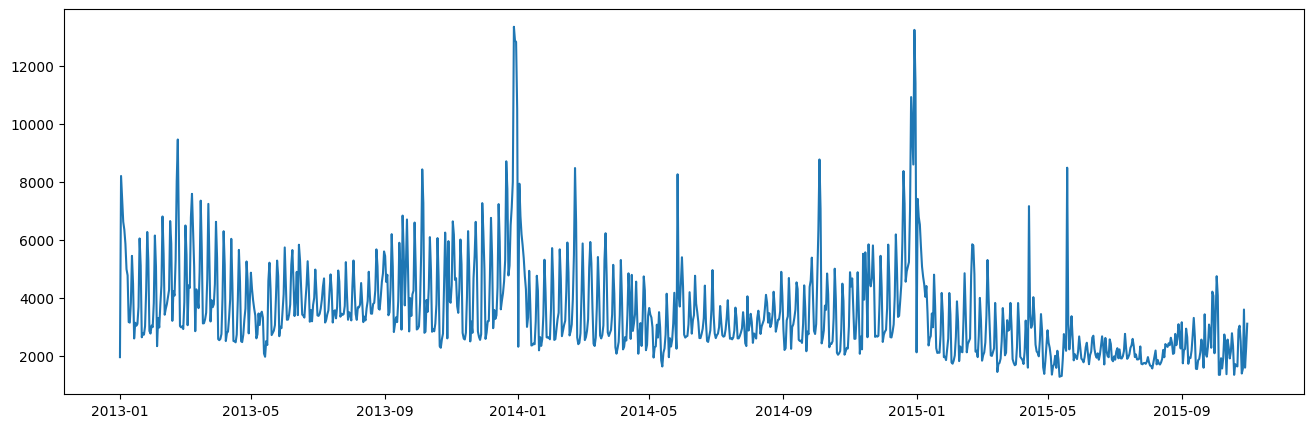

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(ventas.sales,color='tab:blue')
plt.plot()

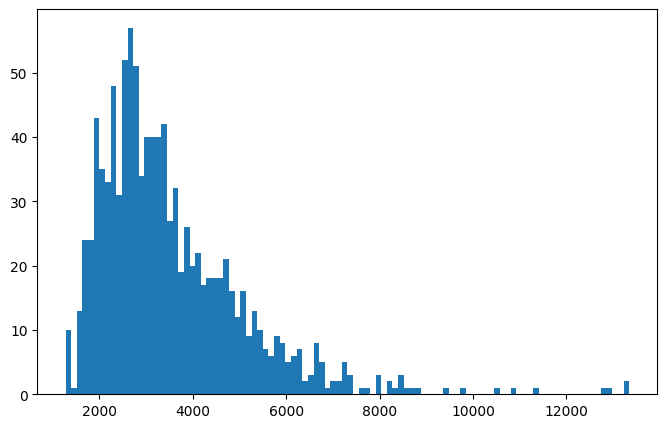

In [ ]:
# Analizamos gráficamente
plt.figure(figsize=(8,5), dpi=100)
plt.hist(ventas.sales, bins = 100)
plt.show();

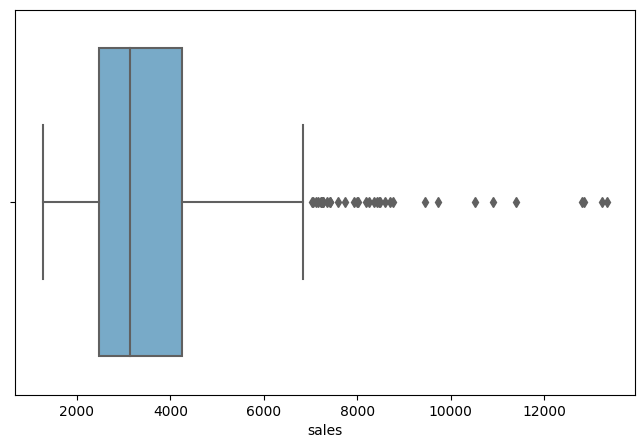

In [ ]:
plt.figure(figsize=(8,5), dpi=100)
sns.boxplot(x = ventas.sales, palette = 'Blues')
plt.show()

In [ ]:
# Validando test de tuckey
# Función de Identificar Outliers (Tuckey):
def calcularOutliars(x):
  Q01 = x.quantile(0.25)
  Q03 = x.quantile(0.75)
  IQR = Q03 - Q01
  a = (x < (Q01 - 1.5 * IQR)) | (x > (Q03 + 1.5 * IQR))
  numOutliars = a[a == True].shape[0]
  pornumOutliars = numOutliars/x.shape[0]
  return pornumOutliars

In [ ]:
# Validando test de tuckey
Q01 = ventas.sales.quantile(0.25)
Q03 = ventas.sales.quantile(0.75)
IQR = Q03 - Q01
LI = Q01 - 1.5*(Q03-Q01)
LS = Q03 + 1.5*(Q03-Q01)

In [ ]:
ventas['outlier'] = 0
ventas.head(10)

,sales,outlier
date,,
2013-01-01,1951.0,0
2013-01-02,8198.0,0
2013-01-03,7422.0,0
2013-01-04,6617.0,0
2013-01-05,6346.0,0
2013-01-06,5858.0,0
2013-01-07,4984.0,0
2013-01-08,4772.0,0
2013-01-09,3162.0,0


In [ ]:
#Detectando los valores outlier
#==============================
#creamos la función de detección
def fun_rep(num):
    if num > LS:
        return 1
    elif num < LI:
        return 1
    else:
        return 0

In [ ]:
ventas['outlier']= ventas['sales'].apply(fun_rep)

In [ ]:
ventas.head(10)

,sales,outlier
date,,
2013-01-01,1951.0,0
2013-01-02,8198.0,1
2013-01-03,7422.0,1
2013-01-04,6617.0,0
2013-01-05,6346.0,0
2013-01-06,5858.0,0
2013-01-07,4984.0,0
2013-01-08,4772.0,0
2013-01-09,3162.0,0


In [ ]:
ventas.groupby('outlier').size()

outlier
0    999
1     35
dtype: int64

In [ ]:
#Imputamos los valores outliers en nuevas variables
#==================================================


In [ ]:
# Interpolate outliers in a ts.
# -----------------------------
# Ubicamos los index outlier
outlier_index = ventas[ventas['outlier'] == 1].index
outlier_index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-02-22', '2013-02-23',
               '2013-03-08', '2013-03-16', '2013-03-23', '2013-10-05',
               '2013-10-06', '2013-11-29', '2013-12-14', '2013-12-21',
               '2013-12-22', '2013-12-26', '2013-12-27', '2013-12-28',
               '2013-12-29', '2013-12-30', '2013-12-31', '2014-01-02',
               '2014-02-22', '2014-05-27', '2014-10-04', '2014-10-05',
               '2014-12-20', '2014-12-21', '2014-12-26', '2014-12-27',
               '2014-12-28', '2014-12-29', '2014-12-30', '2014-12-31',
               '2015-01-02', '2015-04-14', '2015-05-19'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
ventas_clean = ventas.sales.copy() # creamos una copia de la serie
ventas_clean.loc[outlier_index] = np.nan # eliminamos los index con valor outlier

In [ ]:
ventas_clean = ventas_clean.interpolate(method="linear") # realizamos una interpolación lineal

In [ ]:
ventas_clean

date
2013-01-01    1951.000000
2013-01-02    3506.333333
2013-01-03    5061.666667
2013-01-04    6617.000000
2013-01-05    6346.000000
                 ...     
2015-10-27    1551.000000
2015-10-28    3593.000000
2015-10-29    1589.000000
2015-10-30    2274.000000
2015-10-31    3104.000000
Name: sales, Length: 1034, dtype: float64

[]

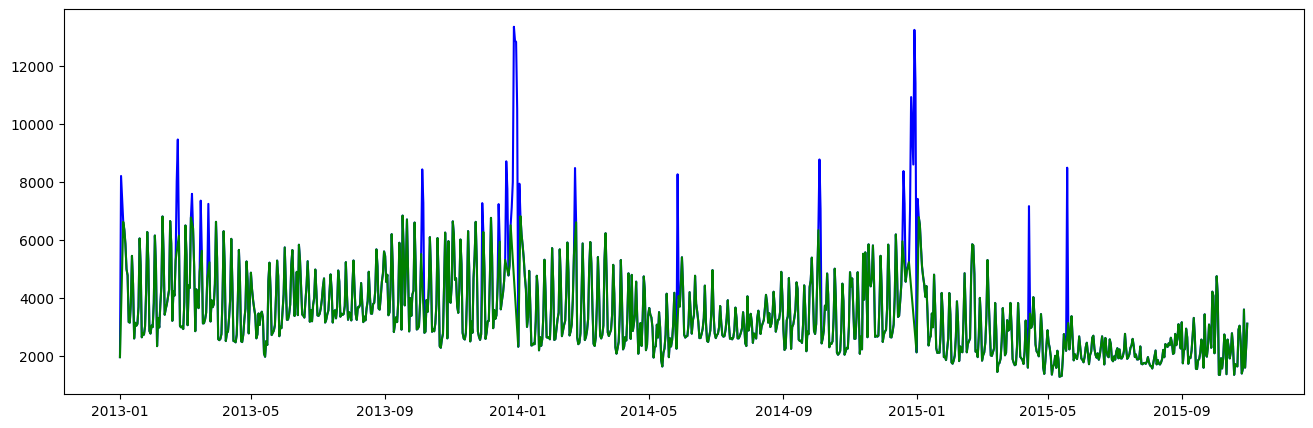

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(ventas.sales,color="blue")
plt.plot(ventas_clean,color="green")
plt.plot()

**(2) Método Multivariados**

**Estadísticas móviles**

Las estadísticas móviles o móviles se calculan deslizando una ventana de cierto tamaño sobre la serie temporal original y agregando los datos para cada ventana. Esto también se conoce como convolucional sobre el índice de tiempo. Los dos parámetros importantes de la operación enrevesada son:

- El tamaño de la ventana. Es el número de unidades de tiempo tomadas como entrada para la función agregada.
- La longitud de la zancada. Establece la brecha a lo largo del índice de tiempo entre cada cálculo.

In [ ]:
## For outliers detection
from sklearn import preprocessing, svm

En la práctica, a menudo se usan métodos deterministas tradicionales, como trazar la distribución y etiquetar como un valor atípico cada observación más alta o más baja que un umbral elegido.

In [ ]:
# rescalado de datos
scaler = preprocessing.StandardScaler() # creamos el objeto de reescalado
ts_scaled = scaler.fit_transform(ventas.sales.values.reshape(-1,1)) # ajuste de reescalado

In [ ]:
ts_scaled

array([[-0.99578556],
       [ 2.9482243 ],
       [ 2.45830087],
       ...,
       [-1.22433231],
       [-0.79186124],
       [-0.26784521]])

In [ ]:
#help(svm.OneClassSVM)

In [ ]:
model = svm.OneClassSVM(nu = 0.05, kernel = 'rbf', gamma = 0.02) # creando mi modelo de imputación (para identificar los outliers)
model.fit(ts_scaled) # ajustando mi modelo a mis datos

OneClassSVM(gamma=0.02, nu=0.05)

In [ ]:
## dtf output
dtf_outliers = ventas.sales.to_frame(name="ts") # copy de mis ventas
dtf_outliers["index"] = range(len(ventas)) # variable de paso
dtf_outliers["outlier"] = model.predict(ts_scaled) # prediciendo outlier
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x==-1 else 0) # transformando datos
dtf_outliers.head(5)

,ts,index,outlier
date,,,
2013-01-01,1951.0,0,0
2013-01-02,8198.0,1,1
2013-01-03,7422.0,2,0
2013-01-04,6617.0,3,0
2013-01-05,6346.0,4,0


In [ ]:
dtf_outliers.groupby('outlier').size()

outlier
0    981
1     53
dtype: int64

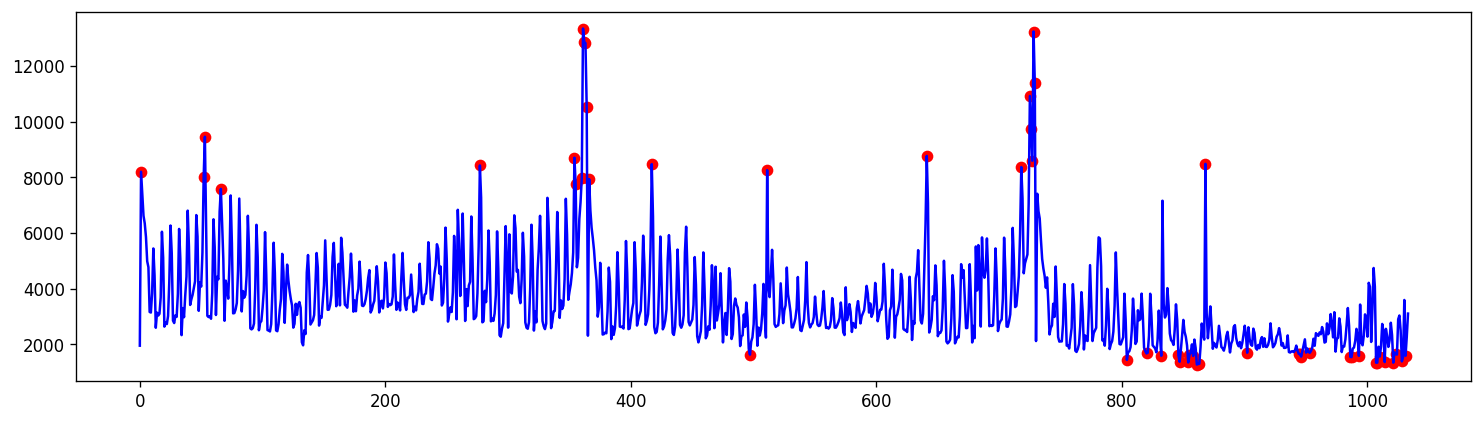

In [ ]:
## plot
fig, ax = plt.subplots(figsize=(15,4))
#ax.set(title="Outliers detection")
ax.plot(dtf_outliers["index"],dtf_outliers["ts"],color="blue")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],
           y=dtf_outliers[dtf_outliers["outlier"]==1]['ts'],
           color='red')
#ax.grid(True)
plt.show()

In [ ]:
# Interpolate outliers in a ts.
# -----------------------------
outlier_index = dtf_outliers[dtf_outliers['outlier'] == 1].index  # obtenelos los indices de los outliers
outlier_index

DatetimeIndex(['2013-01-02', '2013-02-22', '2013-02-23', '2013-03-08',
               '2013-10-05', '2013-12-21', '2013-12-22', '2013-12-27',
               '2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-02', '2014-02-22', '2014-05-13', '2014-05-27',
               '2014-10-04', '2014-12-20', '2014-12-27', '2014-12-28',
               '2014-12-29', '2014-12-30', '2014-12-31', '2015-03-16',
               '2015-04-01', '2015-04-13', '2015-04-27', '2015-04-28',
               '2015-05-05', '2015-05-06', '2015-05-09', '2015-05-12',
               '2015-05-13', '2015-05-14', '2015-05-19', '2015-06-22',
               '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-12',
               '2015-09-14', '2015-09-15', '2015-09-21', '2015-10-05',
               '2015-10-06', '2015-10-08', '2015-10-12', '2015-10-19',
               '2015-10-21', '2015-10-22', '2015-10-26', '2015-10-27',
               '2015-10-29'],
              dtype='datetime64[ns]', name='dat

In [ ]:
ts_clean = ventas.sales.copy()
ts_clean

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
               ...  
2015-10-27    1551.0
2015-10-28    3593.0
2015-10-29    1589.0
2015-10-30    2274.0
2015-10-31    3104.0
Name: sales, Length: 1034, dtype: float64

In [ ]:
ts_clean.loc[outlier_index] = np.nan   # los outliers los marcamos como NaN
ts_clean.head(15)

date
2013-01-01    1951.0
2013-01-02       NaN
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
2013-01-06    5858.0
2013-01-07    4984.0
2013-01-08    4772.0
2013-01-09    3162.0
2013-01-10    3142.0
2013-01-11    3829.0
2013-01-12    5443.0
2013-01-13    4475.0
2013-01-14    2595.0
2013-01-15    3137.0
Name: sales, dtype: float64

In [ ]:
# imputando outlier con interpolacion
ts_clean = ts_clean.interpolate(method = 'linear')

In [ ]:
ts_clean

date
2013-01-01    1951.0
2013-01-02    4686.5
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
               ...  
2015-10-27    3227.0
2015-10-28    3593.0
2015-10-29    2933.5
2015-10-30    2274.0
2015-10-31    3104.0
Name: sales, Length: 1034, dtype: float64

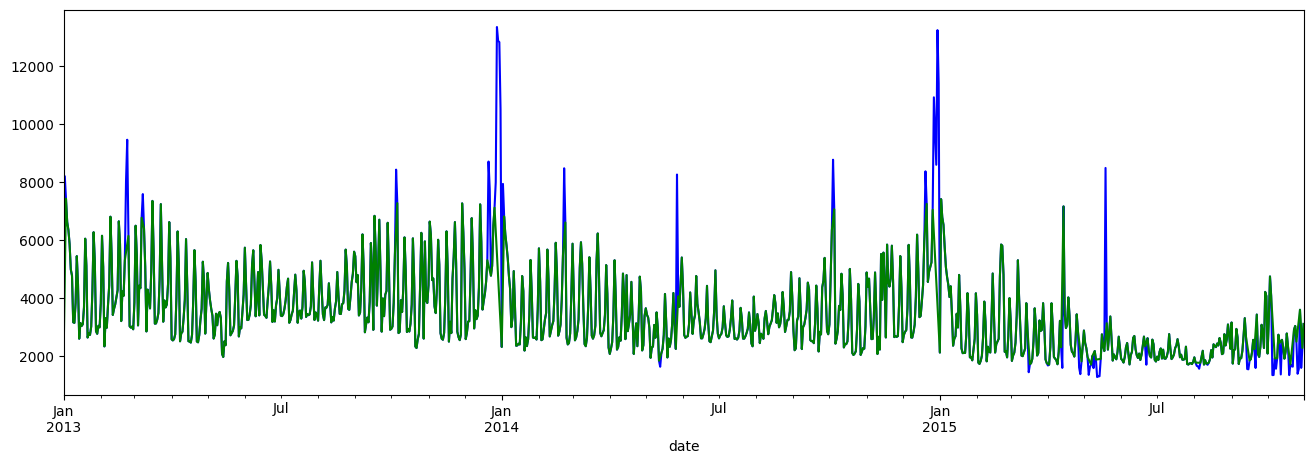

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
ventas.sales.plot(color = 'blue') # Original
ts_clean.plot(color = 'green')  # Imputada
plt.show()

In [ ]:
#help(ts_clean.interpolate)